# Video Games Sales - Exploratory Data Analysis

## Introduction

As a gamer, it's such a pleasure to stumble upon this digital treasure of a dataset. Thanks to the man, [Ulrik](https://www.kaggle.com/ulrikthygepedersen), for providing us this. It allows me to a little bit indulge in nostalgia by revisiting a lot of old titles of happy-childhood games of mine and to develop my skill as an analyst of data.

In this notebook, we will perform an exploratory analysis of a dataset of video games sales globally, from all platforms, from the dawn of time of video games to recent years. We will see what genre, what title in what platforms that has the most sales. We will also see what year saw the most games released

## Data Overview

### Import Necessary Libraries
First thing first, we need to import the modules we are going to use

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/cleaned-video-games-sales/video_games_sales_cleaned.csv
/kaggle/input/video-games-sales/video_games_sales.csv


### Loading the Data

In [2]:
vgs_df = pd.read_csv('/kaggle/input/video-games-sales/video_games_sales.csv')

We should check the data types of the columns to see what we are dealing with

In [3]:
vgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Now let us grab 10 sample data from the dataset

In [4]:
vgs_df.sample(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
927,929,Turok 2: Seeds of Evil,N64,1997.0,Platform,Acclaim Entertainment,1.37,0.41,0.04,0.04,1.86
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
481,482,Kirby Super Star Ultra,DS,2008.0,Platform,Nintendo,1.57,0.04,1.19,0.15,2.96
3641,3643,Jump Super Stars,DS,2005.0,Fighting,Nintendo,0.00,0.00,0.55,0.00,0.55
15578,15581,Metal Fight Beyblade Portable: Chouzetsu Tense...,PSP,2010.0,Action,Takara Tomy,0.00,0.00,0.02,0.00,0.02
16497,16500,Snood 2: On Vacation,GBA,2005.0,Puzzle,Zoo Digital Publishing,0.01,0.00,0.00,0.00,0.01
2804,2806,Practise English!,DS,2007.0,Misc,Nintendo,0.00,0.00,0.73,0.00,0.73
10940,10942,World Soccer Winning Eleven 2010: Aoki Samurai...,PS2,2010.0,Sports,Konami Digital Entertainment,0.00,0.00,0.09,0.00,0.09
10772,10774,Dead or Alive 5,PSV,2013.0,Fighting,Tecmo Koei,0.00,0.05,0.03,0.02,0.10
10976,10978,Agassi Tennis Generation,PS2,2003.0,Sports,DreamCatcher Interactive,0.04,0.03,0.00,0.01,0.09


### Checking Missing Value

We should check if there is NaN or Null values

In [5]:
vgs_df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

We found as many as 271 null values in year column and 58 values in publisher column.

This means we need to clean the data and find the missing values online for the release year of some of the games and the name of the publishers.

However, after I searched for the missing values and manually entered the release year of the games in the spreadsheet I chose not to include the publisher column in this data exploration due to the excessive misinformation in the dataset that would require correction. 

By "misinformation", I mean; **First**, some games have more than one publisher, and the datasets sometimes don’t list the primary publisher. **Second**, there are inconsistencies in how the publisher names are written.

Look how *Marvelous* and *Square Enix* are written here

In [6]:
#filtering games under Marvelous
marvelous_df = vgs_df[vgs_df['publisher'].str.contains('Marvelous', case=False, na=False)]

#Showing different writing of 'Marvelous'
print(marvelous_df['publisher'].unique())

['Marvelous Entertainment' 'Marvelous Interactive' 'Marvelous Games']


In [7]:
#filtering games under Square Enix
square_df = vgs_df[vgs_df['publisher'].str.contains('Square', case=False, na=False)]

#Showing different writing of 'Square Enix'
print(square_df['publisher'].unique())

['SquareSoft' 'Square Enix' 'Square' 'Square EA']


In [8]:
print("The games under Marvelous are {} games".format(marvelous_df.shape[0]))
print("And the games under Square Enix are {} games".format(square_df.shape[0]))

The games under Marvelous are 69 games
And the games under Square Enix are 292 games


Not to mention other names too.

Additionally, I discovered that even though some values are non-null, they still contain entries labeled as 'Unknown'

In [9]:
unknown_df = vgs_df[vgs_df['publisher']=='Unknown']
print("And the games with \"unknown\" publisher are {} games".format(unknown_df.shape[0]))

And the games with "unknown" publisher are 203 games


All that number in total is too much for this. We can clean that data publisher column in another occasion

### Cleaned-Up Data

Here's the cleaned-up datasets that I have input it manually in spreadsheet.

In [10]:
# Reading the cleaned data set with different encoding as I saved it not in UTF-8
clean_vgs_df = pd.read_csv('/kaggle/input/cleaned-video-games-sales/video_games_sales_cleaned.csv', encoding='ISO-8859-1')

# Dropping the Publisher Column
clean_vgs_df.drop(columns=['publisher'], inplace=True)

Let us see the sample data

In [11]:
clean_vgs_df.sample(10)

,rank,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
14051,14053,Alpha Protocol,PC,2010,Role-Playing,0.00,0.03,0.00,0.01,0.04
15840,15844,Usavichi: Game no Jikan,DS,2011,Action,0.00,0.00,0.02,0.00,0.02
10214,10216,Lunacy,SAT,1996,Adventure,0.00,0.00,0.11,0.00,0.11
722,724,Teenage Mutant Ninja Turtles II: The Arcade Game,NES,1990,Action,1.74,0.25,0.21,0.03,2.23
14841,14844,SWAT 4,PC,2005,Shooter,0.00,0.02,0.00,0.00,0.03
10902,10904,"Prinny 2: Dawn of Operation Panties, Dood!",PSP,2010,Platform,0.05,0.00,0.03,0.01,0.09
3555,3557,Bolt,Wii,2008,Adventure,0.19,0.31,0.00,0.06,0.57
12511,12513,Marvel Super Heroes,SAT,1997,Fighting,0.00,0.00,0.06,0.00,0.06
3181,3183,Middle-Earth: Shadow of Mordor,PS3,2014,Action,0.20,0.33,0.01,0.10,0.64
11333,11335,Miami Nights: Singles in the City,DS,2008,Simulation,0.08,0.00,0.00,0.01,0.08


And let us check the null values

In [12]:
clean_vgs_df.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

Now there are no null values anymore and publisher column is removed

## Summary Statistics

Before we dig deeper into the details, it's helpful to get a general idea of what the data looks like. We will look at some basic numbers that give us an overview of the data.

In [13]:
clean_vgs_df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000
mean,8299.723548,2006.388045,0.264699,0.146670,0.077790,0.048069,0.537504
std,4791.464680,5.866358,0.816727,0.505379,0.309308,0.188599,1.555111
min,1.000000,1977.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4150.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8299.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12448.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
clean_vgs_df[['name','platform','genre']].describe()

,name,platform,genre
count,16596,16596,16596
unique,11493,31,12
top,Need for Speed: Most Wanted,DS,Action
freq,12,2163,3316


## All-Platforms Data Frames

### Now, we want to combine the sales of each game across all platforms into a single total. 

In [15]:
allplatforms_vgs_df = clean_vgs_df.drop(columns=['rank','platform'], inplace=False).groupby('name').agg({
    'year':'first',
    # We don't want to sum the year,
    # so I take only the first as that is when the game is firstly released
    'genre':'first',
    # I also don't want to sum the categorical column
    # as it will join them into, like,'ActionActionAction'
    'na_sales':'sum',
    'eu_sales':'sum',
    'jp_sales':'sum',
    'other_sales':'sum',
    'global_sales':'sum'
    })
allplatforms_vgs_df = allplatforms_vgs_df.sort_values("global_sales", ascending=False)
# I sort it to match the original data frame

allplatforms_vgs_df.reset_index(inplace=True)
# if we don't reset the index, the name will be the index

## The Visualization

Here's the fun begins. We will see the visualized numbers of sales of the highest-selling genre, highest sales on PlayStation 1, the comparison of highest-selling titles between PlayStation and Xbox, highest-selling games in Nintendo Wii, and we will see what year released the most.

### The Best-Selling Genre

In [16]:
most_genre = clean_vgs_df.groupby('genre')['global_sales'].sum().reset_index().sort_values('global_sales', ascending=False)

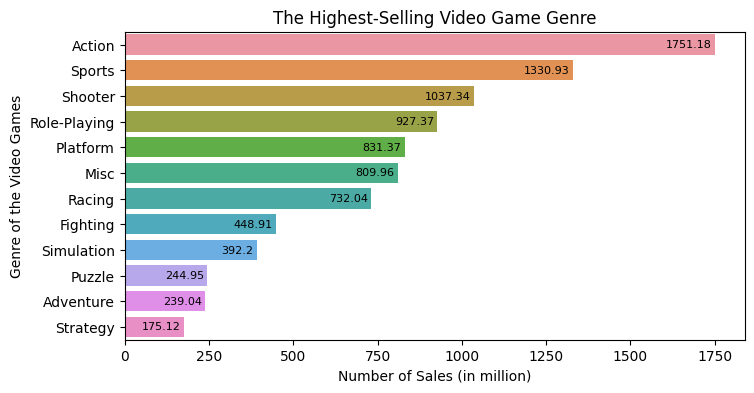

In [17]:
plt.figure(figsize=(8, 4))
plots = sns.barplot(x='global_sales', y='genre', data=most_genre, orient='h')

# To give the chart annotations 
for index, value in enumerate(most_genre['global_sales']):
    plt.text(value - 10, index, str(value), va='center', ha='right', fontsize=8)

plt.title("The Highest-Selling Video Game Genre")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Genre of the Video Games')
plt.show();

As observed, action games are the best-selling genre, with 1.75 billion sales across all platforms. However, this number could be even higher, as many adventure games also fall under the action category.

Another interesting point is that the miscellaneous genre has more sales than racing and fighting games. Given its sales volume, I wonder how many new genres could be categorized from it."

### The Best-Selling Games on PlayStation 1

In [18]:
ps1_games = clean_vgs_df[clean_vgs_df['platform']=='PS']

In [19]:
top10_ps1 = ps1_games.sort_values('global_sales', ascending=False).head(10)

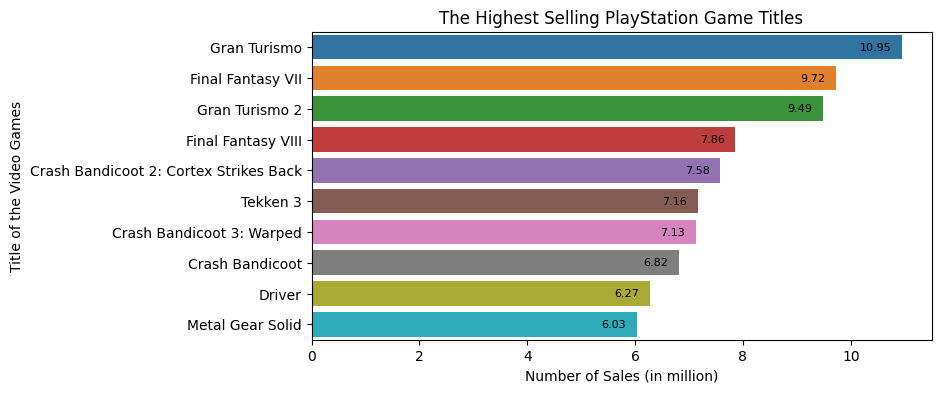

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(x='global_sales', y='name', data=top10_ps1, orient='h')

for index, value in enumerate(top10_ps1['global_sales']):
    plt.text(value - 0.2, index, str(value), va='center', ha='right', fontsize=8)

plt.title("The Highest Selling PlayStation Game Titles")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Title of the Video Games')
plt.show();

Gran Turismo is the best-selling game title for PlayStation 1. The sequel even is in the top 3. All of the Crash Bandicoot titles unsurprisingly are all there

### The Best-Selling Games on PlayStation 2 and Xbox

In [21]:
top10_ps2 = clean_vgs_df[clean_vgs_df['platform']=='PS2'].sort_values('global_sales', ascending=False).head(10)

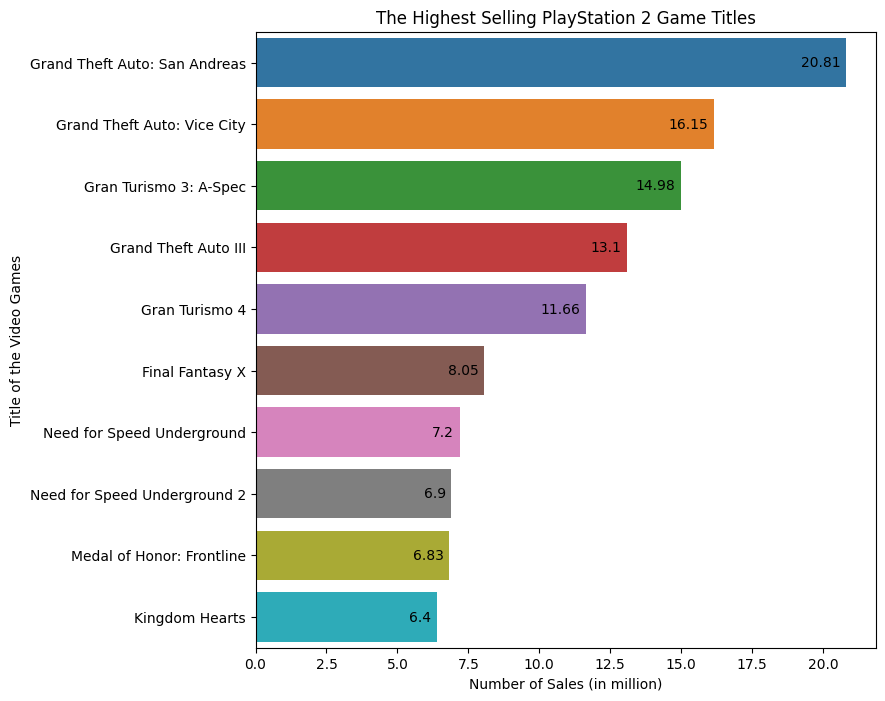

In [22]:
plt.figure(figsize=(8, 8))
sns.barplot(x='global_sales', y='name', data=top10_ps2, orient='h')

for index, value in enumerate(top10_ps2['global_sales']):
    plt.text(value - 0.2, index , str(value), va='center', ha='right', fontsize=10)

plt.title("The Highest Selling PlayStation 2 Game Titles")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Title of the Video Games')
plt.show();

GTA: San Andreas is obviously the best-selling video games on PS2, along with its prequels on the top 10. What shocks me is that NFS Underground 2 is lower in sales than its predecessor, NFS Underground.

Once we have seen what is sold the most in PlayStation 2, now we are going to see what happened in the realm of its rival, XBox.

In [23]:
top10_xbox = clean_vgs_df[clean_vgs_df['platform']=='XB'].sort_values('global_sales',ascending=False).head(10)

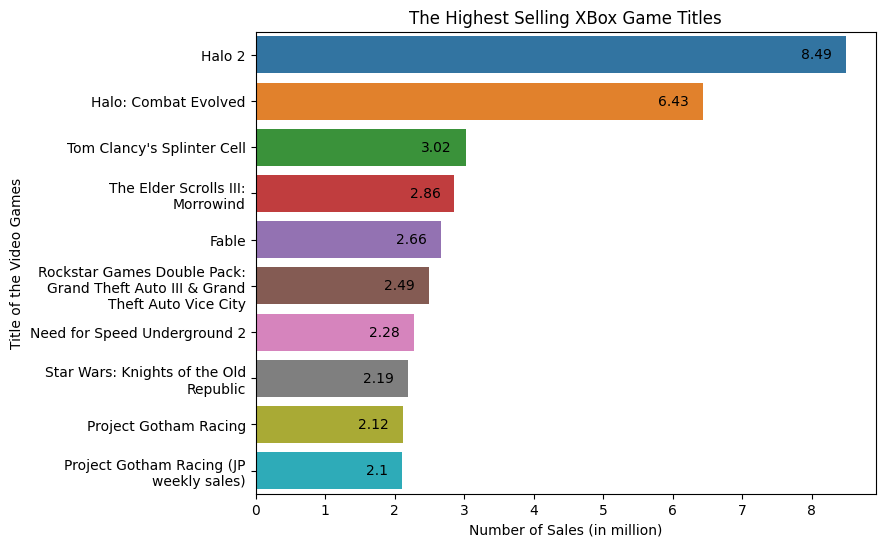

In [24]:
import textwrap

# we need to 'wrap' the text, the title that is too long
top10_xbox['name'] = top10_xbox['name'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=30)))

plt.figure(figsize=(8,6))
plots = sns.barplot(x='global_sales', y='name', data=top10_xbox, orient='h')
for index, value in enumerate(top10_xbox['global_sales']):
    plt.text(value - 0.2, index, str(value), va='center', ha='right', fontsize=10)

plt.title("The Highest Selling XBox Game Titles")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Title of the Video Games')
plt.show();

There is only one video game title, if we exclude Rockstar Games Double Pack, that shows both in Top 10 Playstation 2 and Top 10 Xbox lists, which is NFS Underground 2. In that era, there is exclusivity, where a video game that is sold on PlayStation will never be sold on its rival, and vice versa.

### The Best-Selling Games on PlayStation 3 and Xbox 360

Let's see another comparison, the highest selling video game titles on PlayStation 3 and Xbox 360.

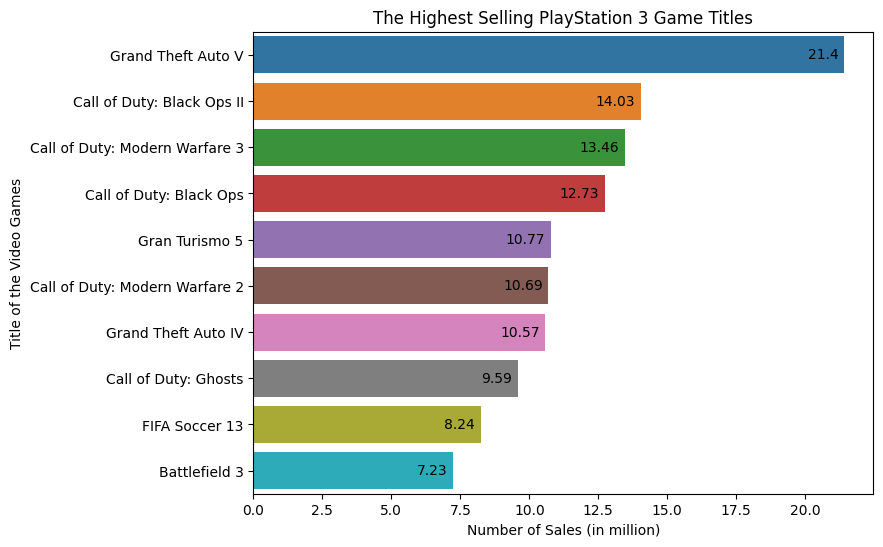

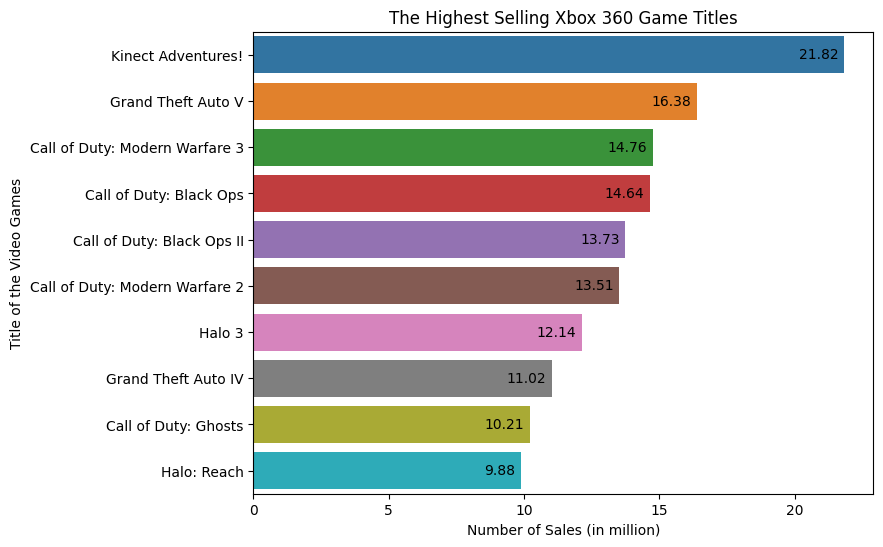

In [25]:
top10_ps3 = clean_vgs_df[clean_vgs_df['platform']=='PS3'].sort_values('global_sales', ascending=False).head(10)
top10_x360 = clean_vgs_df[clean_vgs_df['platform']=='X360'].sort_values('global_sales',ascending=False).head(10)

#First bar chart for PS3 games
plt.figure(figsize=(8,6))
plots = sns.barplot(x='global_sales', y='name', data=top10_ps3, orient='h')
for index, value in enumerate(top10_ps3['global_sales']):
    plt.text(value - 0.2, index, str(value), va='center', ha='right', fontsize=10)

plt.title("The Highest Selling PlayStation 3 Game Titles")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Title of the Video Games')
plt.show();

# Second bar chart for Xbox 360 games
plt.figure(figsize=(8,6))
plots = sns.barplot(x='global_sales', y='name', data=top10_x360, orient='h')
for index, value in enumerate(top10_x360['global_sales']):
    plt.text(value - 0.2, index, str(value), va='center', ha='right', fontsize=10)

plt.title("The Highest Selling Xbox 360 Game Titles")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Title of the Video Games')
plt.show();

There is a significant overlap here: 7 out of the 10 best-selling titles on PlayStation 3 are also among the top sellers on Xbox 360. Developers began expanding their reach by creating games for both platforms.

### The Highest-Selling Games on Wii
Now we go to Nintendo Wii, arguably, the most succesful console that Nintendo has.

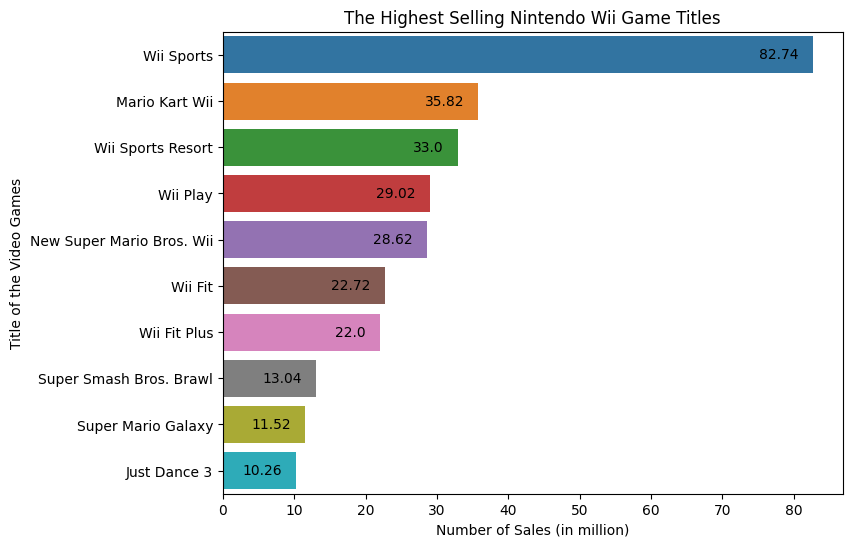

In [26]:
top10_wii = clean_vgs_df[clean_vgs_df['platform']=='Wii'].sort_values('global_sales', ascending=False).head(10)

plt.figure(figsize=(8,6))
plots = sns.barplot(x='global_sales', y='name', data=top10_wii, orient='h')
for index, value in enumerate(top10_wii['global_sales']):
    plt.text(value - 2, index, str(value), va='center', ha='right', fontsize=10)

plt.title("The Highest Selling Nintendo Wii Game Titles")
plt.xlabel('Number of Sales (in million)')
plt.ylabel('Title of the Video Games')
plt.show();

Wii Sports excels all other games with whopping 82.74 million sales around the world. One thing that I think is the significant factor of the game's succesful sales is that it involves our body in playing it, one of the revolutionary ideas in gaming history. That and the fact that how casual this game is.

### The Most Games-Released Year

For this chart, we need to group the dataset by the name of the games as, if a video game is released for many platforms in different years, we need just the earliest release year. 

In [27]:
allplatforms_vgs_df = clean_vgs_df.drop(columns=['rank','platform'], inplace=False).groupby('name').agg({
    # We don't want to sum the year,
    # so I take only the first as that is when the game is firstly released
    'year':'first',
    # I also don't want to sum the categorical column like genre
    # as it will join them into, like,'ActionActionAction'
    'genre':'first',
    'na_sales':'sum',
    'eu_sales':'sum',
    'jp_sales':'sum',
    'other_sales':'sum',
    'global_sales':'sum'
    })
# I sort it to match the original data frame order
allplatforms_vgs_df = allplatforms_vgs_df.sort_values("global_sales", ascending=False)

# if we don't reset the index, the name column will be the index
allplatforms_vgs_df.reset_index(inplace=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


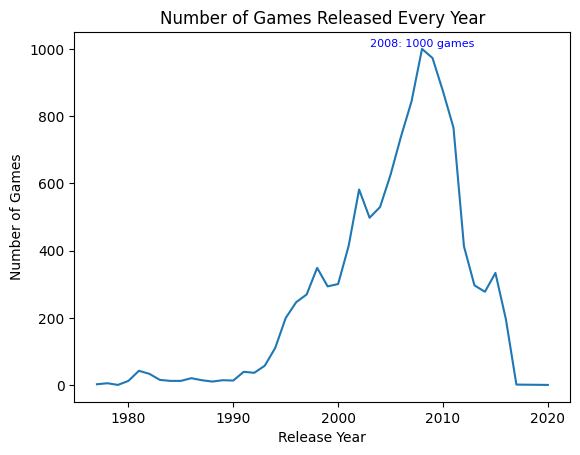

In [28]:
ngames_ayear = allplatforms_vgs_df.groupby('year')['name'].count().reset_index()

sns.lineplot(data=ngames_ayear, x='year', y='name')

#I want to ignore the warning messages
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Annotating the peak point
max_value = ngames_ayear['name'].max()
max_year = ngames_ayear[ngames_ayear['name'] == max_value]['year'].values[0]
plt.text(max_year, max_value , f'{max_year}: {max_value} games', ha='center', va='bottom', fontsize=8, color='blue')

plt.title("Number of Games Released Every Year")
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.show();

It's interesting to see that despite the U.S. recession in 2008, around 1,000 games were still released that year.

## Conclusion

That is the result of the exploratory analysis of video games sales dataset. We now know what is sold the most on PlayStation 1 and Nintendo Wii, which is Gran Turismo and Wii Sports respectively. We also see when platform exclusivity existed in PlayStation2-Xbox era, the top 10 highest-selling titles in both platforms are like two different realms. When exclusivity was gone in their successor era, the lists have significant overlapping titles. However, the most interesting thing to notice is that despite the recession in 2008, developers still released 1,000 games.

Indeed, this analysis has a lot of rooms for improvement, these datasets need cross-checking, and there are more insights to be discovered. I look forward to expanding on this analysis  in the future.
